<a href="https://colab.research.google.com/github/jvo024/spotify_songs_ads504/blob/main/spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Normalizer, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate
import scipy.stats as stats
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from matplotlib import markers
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings

warnings.filterwarnings("ignore")

## 1. Import Dataset

In [ ]:
base_df = pd.read_csv('https://raw.githubusercontent.com/orzanai/Moodify/main/Datasets/278k_song_labelled.csv')
base_df.head()

Unnamed: 0  duration (ms)  danceability  energy  loudness  speechiness  \
0           0       195000.0         0.611   0.614    -8.815       0.0672   
1           1       194641.0         0.638   0.781    -6.848       0.0285   
2           2       217573.0         0.560   0.810    -8.029       0.0872   
3           3       443478.0         0.525   0.699    -4.571       0.0353   
4           4       225862.0         0.367   0.771    -5.863       0.1060   

   acousticness  instrumentalness  liveness  valence    tempo     spec_rate  \
0        0.0169          0.000794    0.7530    0.520  128.050  3.446154e-07   
1        0.0118          0.009530    0.3490    0.250  122.985  1.464234e-07   
2        0.0071          0.000008    0.2410    0.247  170.044  4.007850e-07   
3        0.0178          0.000088    0.0888    0.199   92.011  7.959809e-08   
4        0.3650          0.000001    0.0965    0.163  115.917  4.693131e-07   

   labels  
0       2  
1       1  
2       1  
3       0  
4       1

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        277938 non-null  int64  
 1   duration (ms)     277938 non-null  float64
 2   danceability      277938 non-null  float64
 3   energy            277938 non-null  float64
 4   loudness          277938 non-null  float64
 5   speechiness       277938 non-null  float64
 6   acousticness      277938 non-null  float64
 7   instrumentalness  277938 non-null  float64
 8   liveness          277938 non-null  float64
 9   valence           277938 non-null  float64
 10  tempo             277938 non-null  float64
 11  spec_rate         277938 non-null  float64
 12  labels            277938 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 27.6 MB


In [ ]:
base_df.describe().T

count          mean           std     min           25%  \
Unnamed: 0        277938.0  1.389685e+05  8.023393e+04     0.0  6.948425e+04   
duration (ms)     277938.0  2.324961e+05  1.171830e+05  6706.0  1.720130e+05   
danceability      277938.0  5.525834e-01  1.889048e-01     0.0  4.310000e-01   
energy            277938.0  5.568658e-01  2.796813e-01     0.0  3.420000e-01   
loudness          277938.0 -1.036365e+01  6.672049e+00   -60.0 -1.274700e+01   
speechiness       277938.0  8.791327e-02  1.125001e-01     0.0  3.590000e-02   
acousticness      277938.0  3.865827e-01  3.645043e-01     0.0  3.380000e-02   
instrumentalness  277938.0  2.550443e-01  3.737446e-01     0.0  0.000000e+00   
liveness          277938.0  1.892167e-01  1.635964e-01     0.0  9.620000e-02   
valence           277938.0  4.496018e-01  2.674714e-01     0.0  2.200000e-01   
tempo             277938.0  1.191960e+02  3.046226e+01     0.0  9.507225e+01   
spec_rate         277938.0  4.754654e-07  9.190229e-07     0.0  1.531461e-07   
labels            277938.0  1.179101e+00  1.021033e+00     0.0  0.000000e+00   

                           50%           75%           max  
Unnamed: 0        1.389685e+05  2.084528e+05  2.779370e+05  
duration (ms)     2.131055e+05  2.648660e+05  3.919895e+06  
danceability      5.710000e-01  6.930000e-01  9.890000e-01  
energy            5.910000e-01  7.920000e-01  1.000000e+00  
loudness         -8.397000e+00 -5.842000e+00  4.882000e+00  
speechiness       4.710000e-02  8.220000e-02  9.650000e-01  
acousticness      2.620000e-01  7.540000e-01  9.960000e-01  
instrumentalness  1.090000e-03  6.450000e-01  1.000000e+00  
liveness          1.210000e-01  2.270000e-01  1.000000e+00  
valence           4.340000e-01  6.650000e-01  1.000000e+00  
tempo             1.199400e+02  1.388698e+02  2.449470e+02  
spec_rate         2.345459e-07  4.449937e-07  5.971860e-05  
labels            1.000000e+00  2.000000e+00  3.000000e+00

## 2. EDA & Pre-Processing

### 2.1. Exploratory Data Analysis

In [ ]:
# Remove irrevelevant columns
drop = ['Unnamed: 0']
base_df.drop(drop, axis = 1, inplace = True)

# Identify null values
base_df.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

In [ ]:
base_df.shape

(277938, 12)

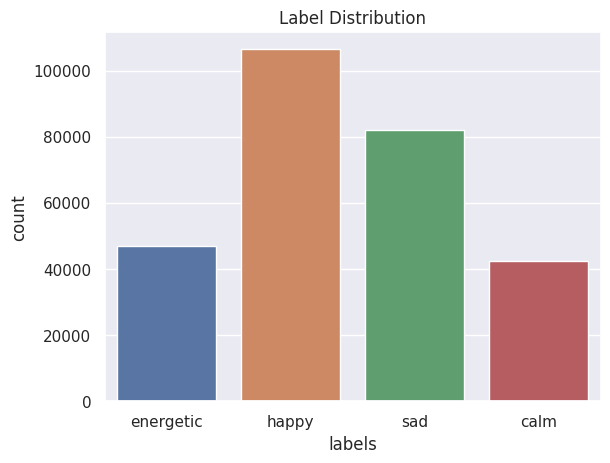

In [ ]:
#convert lables column from 0,1,2,3 to actual labels for classification model
new_labels = {0 : 'sad',
             1 : "happy",
             2 : 'energetic',
             3 : "calm"
             }

new_df = base_df.copy()

new_df['labels'] = new_df['labels'].map(new_labels)
new_df.head()

sns.set(style="darkgrid")
sns.countplot(x = new_df['labels'])
plt.title('Label Distribution')
plt.show()

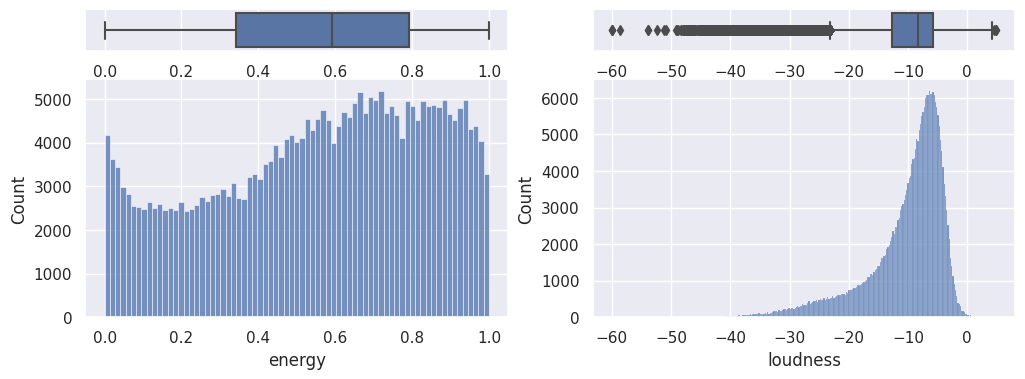

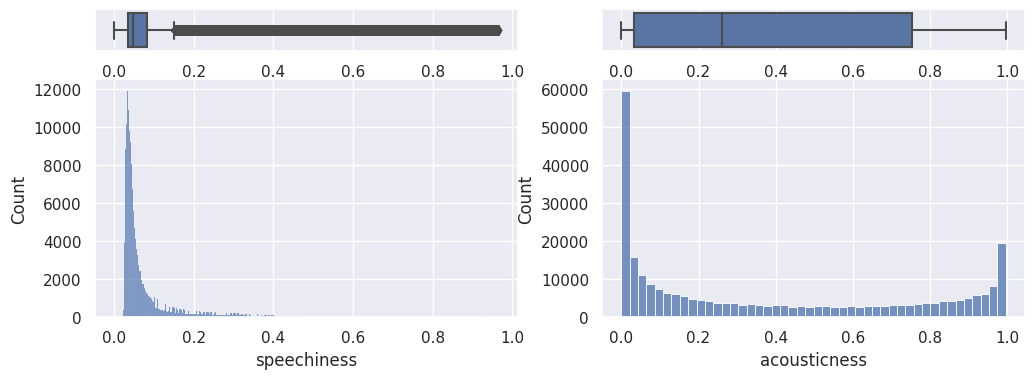

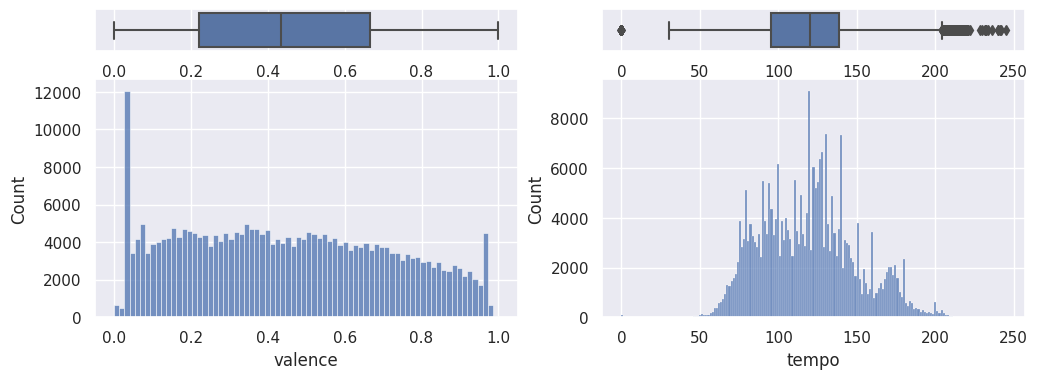

In [ ]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(base_df, "duration (ms)", "danceability")
print_box_hist(base_df, "energy", "loudness")
print_box_hist(base_df, "speechiness", "acousticness")
print_box_hist(base_df, "instrumentalness", "liveness")
print_box_hist(base_df, "valence", "tempo")
# spec_rate was not included because this was a very uncorrelated variable

The figure above indicates that many variables are highly skewed and/or have many outliers.


In [ ]:
# Numerical columns for the correlation matrix
numerical_columns = base_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Text(0.5, 1.0, 'Energy QQ Plot')

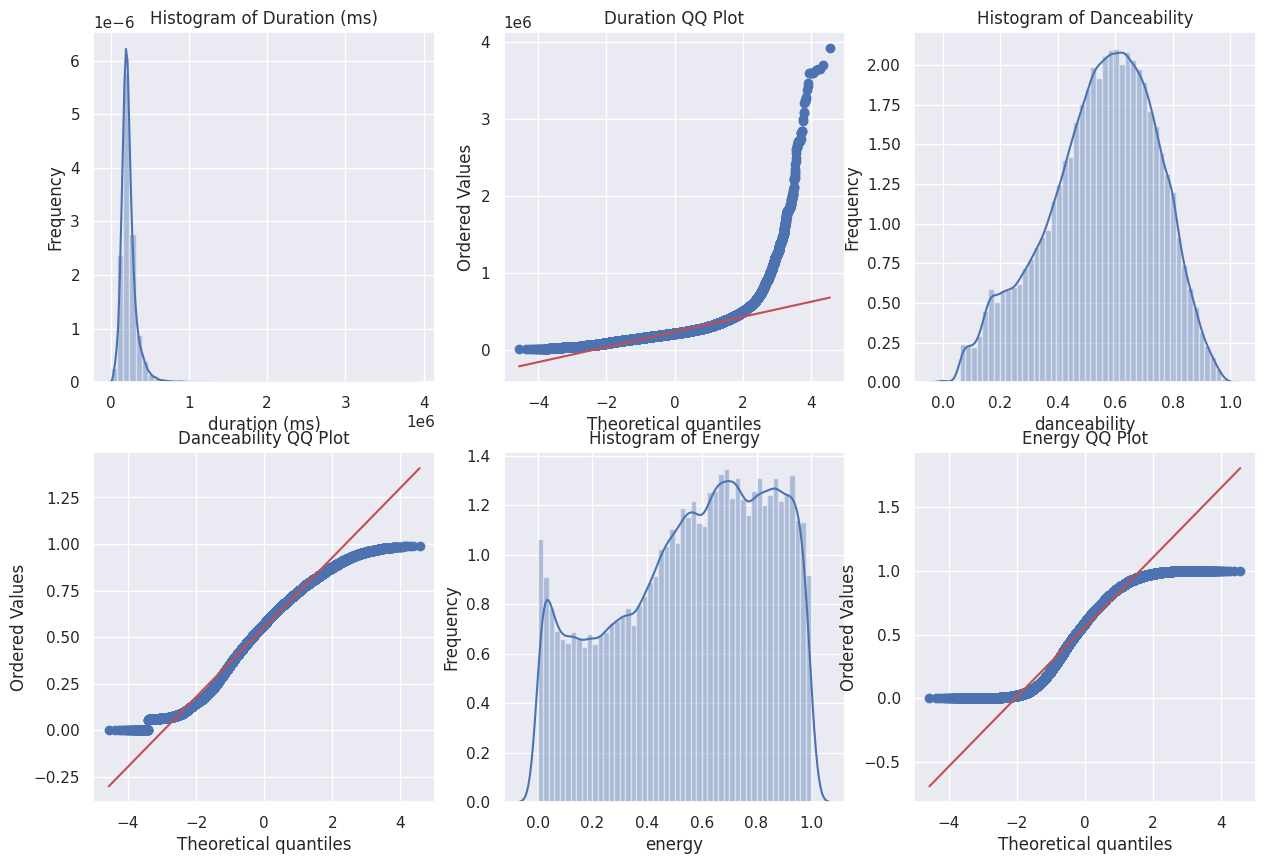

In [ ]:
# build histograms to get distribtuions

fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.distplot(base_df['duration (ms)'])
plt.ylabel("Frequency")
plt.title("Histogram of Duration (ms)")
plt.subplot(2,3,2)
stats.probplot(base_df['duration (ms)'], dist="norm", plot=plt)
plt.title('Duration QQ Plot')

plt.subplot(2,3,3)
sns.distplot(base_df['danceability'])
plt.ylabel("Frequency")
plt.title("Histogram of Danceability")
plt.subplot(2,3,4)
stats.probplot(base_df['danceability'], dist="norm", plot=plt)
plt.title('Danceability QQ Plot')


plt.subplot(2,3,5)
sns.distplot(base_df['energy'])
plt.ylabel("Frequency")
plt.title("Histogram of Energy")
plt.subplot(2,3,6)
stats.probplot(base_df['energy'], dist="norm", plot=plt)
plt.title('Energy QQ Plot')

Text(0.5, 1.0, 'Acousticness QQ Plot')

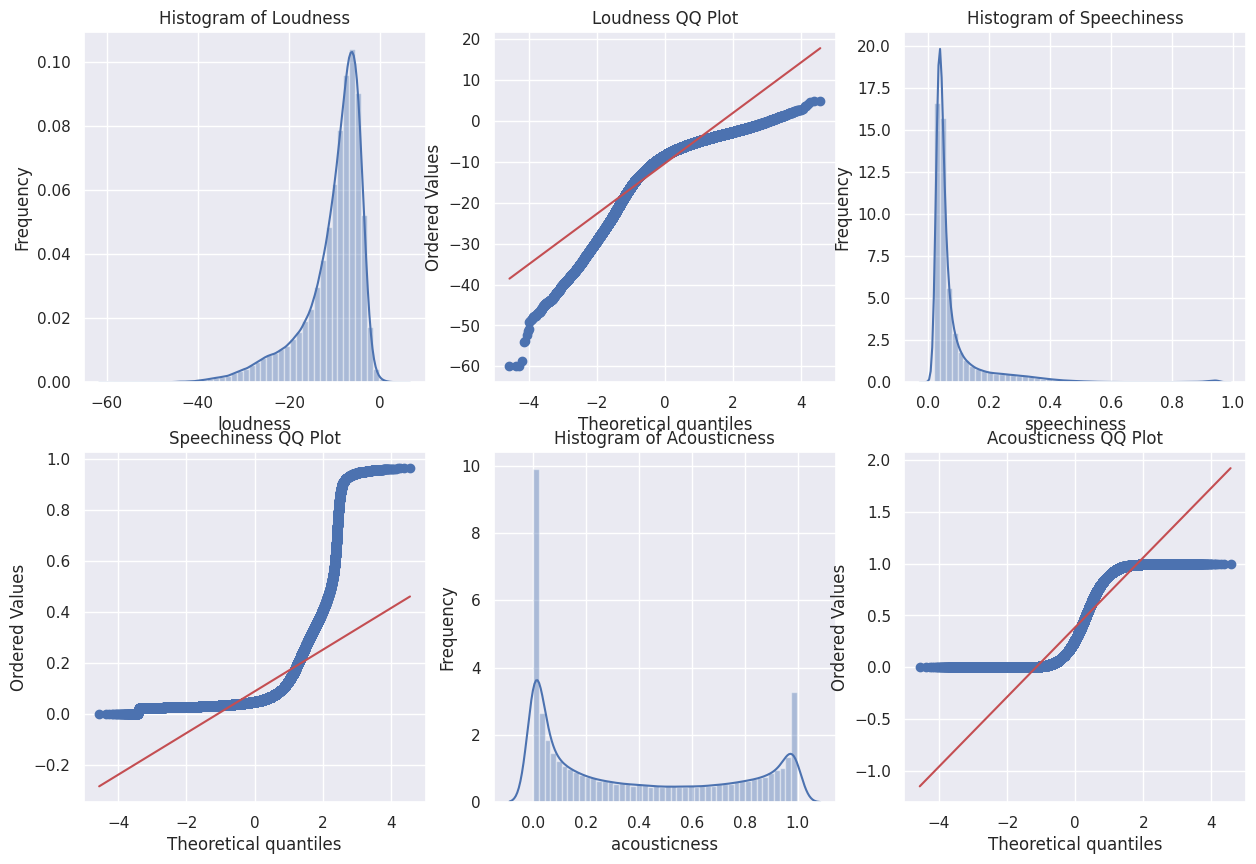

In [ ]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.distplot(base_df['loudness'])
plt.ylabel("Frequency")
plt.title("Histogram of Loudness")
plt.subplot(2,3,2)
stats.probplot(base_df['loudness'], dist="norm", plot=plt)
plt.title('Loudness QQ Plot')


plt.subplot(2,3,3)
sns.distplot(base_df['speechiness'])
plt.ylabel("Frequency")
plt.title("Histogram of Speechiness")
plt.subplot(2,3,4)
stats.probplot(base_df['speechiness'], dist="norm", plot=plt)
plt.title('Speechiness QQ Plot')

plt.subplot(2,3,5)
sns.distplot(base_df['acousticness'])
plt.ylabel("Frequency")
plt.title("Histogram of Acousticness")
plt.subplot(2,3,6)
stats.probplot(base_df['acousticness'], dist="norm", plot=plt)
plt.title('Acousticness QQ Plot')

In [ ]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.distplot(base_df['instrumentalness'])
plt.ylabel("Frequency")
plt.title("Histogram of Instrumentalness")
plt.subplot(2,3,2)
stats.probplot(base_df['instrumentalness'], dist="norm", plot=plt)
plt.title('Instrumentalness QQ Plot')

plt.subplot(2,3,3)
sns.distplot(base_df['liveness'])
plt.ylabel("Frequency")
plt.title("Histogram of Liveness")
plt.subplot(2,3,4)
stats.probplot(base_df['liveness'], dist="norm", plot=plt)
plt.title('Liveness QQ Plot')


plt.subplot(2,3,5)
sns.distplot(base_df['valence'])
plt.ylabel("Frequency")
plt.title("Histogram of Valence")
plt.subplot(2,3,6)
stats.probplot(base_df['valence'], dist="norm", plot=plt)
plt.title('Valence QQ Plot')

plt.show();

liveness, valence, instrumentals

In [ ]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.distplot(base_df['tempo'])
plt.ylabel("Frequency")
plt.title("Histogram of Tempo")
plt.subplot(2,3,2)
stats.probplot(base_df['tempo'], dist="norm", plot=plt)
plt.title('Tempo QQ Plot')

plt.subplot(2,3,3)
sns.distplot(base_df['spec_rate'])
plt.ylabel("Frequency")
plt.title("Histogram of Spec Rate")
plt.subplot(2,3,4)
stats.probplot(base_df['spec_rate'], dist="norm", plot=plt)
plt.title('Spec Rate QQ Plot')

plt.show();

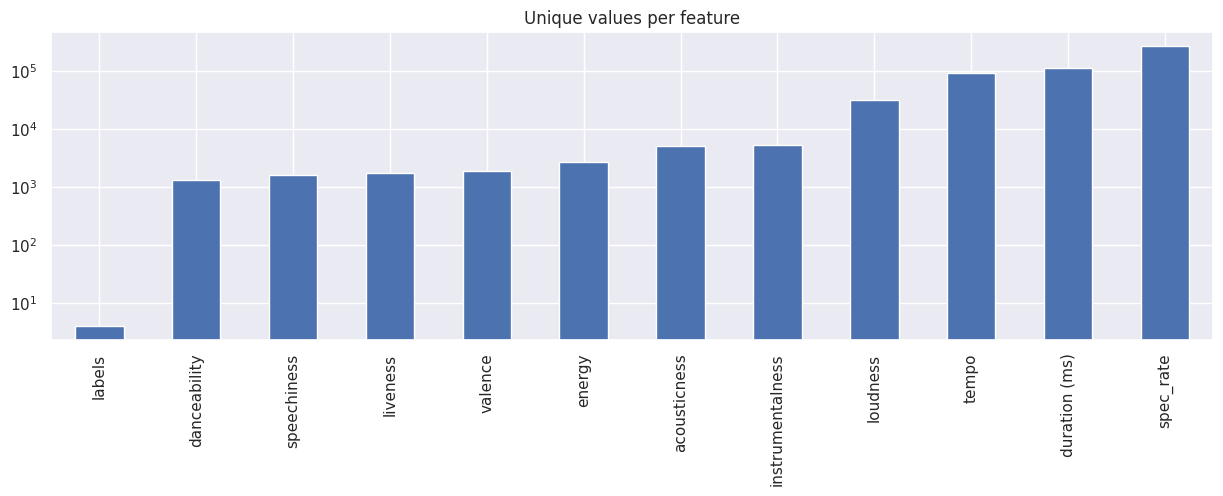

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = base_df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [ ]:
# Choose multiple numerical columns for the pairplot
numerical_columns = ['danceability', 'energy', 'liveness']

# Create a pairplot
sns.pairplot(base_df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

In [ ]:
new_labels

{0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

In [ ]:
# obtain the top most correlated factors to lables
top_correlated = base_df.corr()['labels'].abs()
top_correlated_2 = top_correlated.nlargest(6).index

corr_df = base_df[['instrumentalness', 'loudness', 'danceability',
                   'valence', 'duration (ms)', 'labels']]

# Identified instrumentalness, loudness, danceability, valence, and duration to
# be 5 most correlated features

g = sns.PairGrid(corr_df, hue="labels")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(labels = ['sad', 'happy', 'energetic', 'calm'])

#### 2.1.1. Build a function to remove the outliers in the data

In [ ]:
def remove_outliers(data, columns, lower_bound = 0.25, upper_bound = 0.75):
    masks = []
    for column in columns:
        q1 = data[column].quantile(lower_bound)
        q3 = data[column].quantile(upper_bound)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (data[column] >= lower) & (data[column] <= upper)
        masks.append(mask)

    # Combine the masks
    final_mask = np.all(masks, axis=0)

    # Remove outliers
    final_dataset = data[final_mask]

    return final_dataset

In [ ]:
#convert lables column from 0,1,2,3 to actual labels for classification model
new_labels = {0 : 'sad',
             1 : "happy",
             2 : 'energetic',
             3 : "calm"
             }

new_df = base_df.copy()

new_df['labels'] = new_df['labels'].map(new_labels)
new_df.head()

duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate     labels  
0          0.000794    0.7530    0.520  128.050  3.446154e-07  energetic  
1          0.009530    0.3490    0.250  122.985  1.464234e-07      happy  
2          0.000008    0.2410    0.247  170.044  4.007850e-07      happy  
3          0.000088    0.0888    0.199   92.011  7.959809e-08        sad  
4          0.000001    0.0965    0.163  115.917  4.693131e-07      happy

In [ ]:
columns_to_remove = ['duration (ms)', 'danceability', 'loudness', 'speechiness', 'liveness', 'tempo']
new_df_1 = remove_outliers(new_df, columns_to_remove)

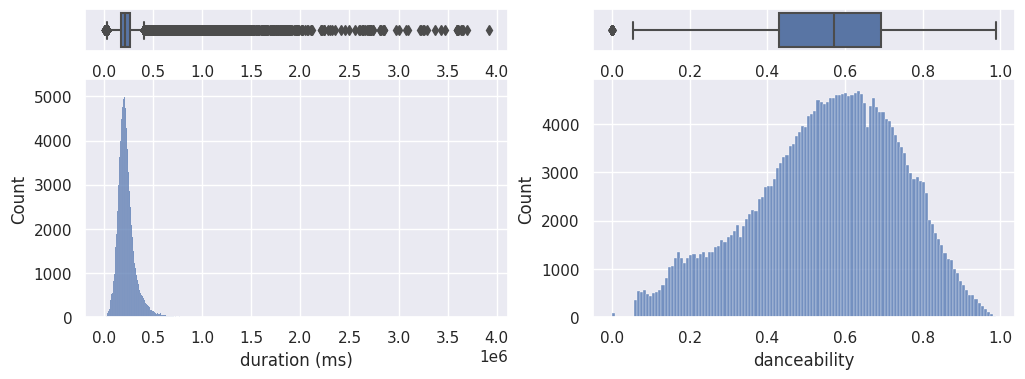

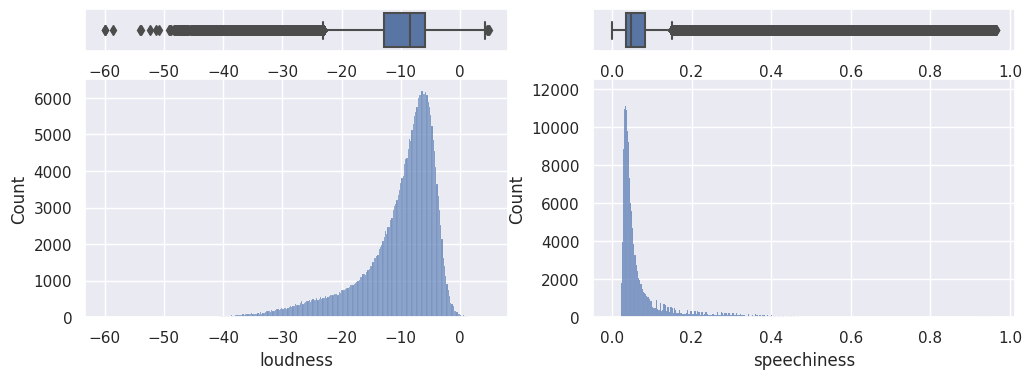

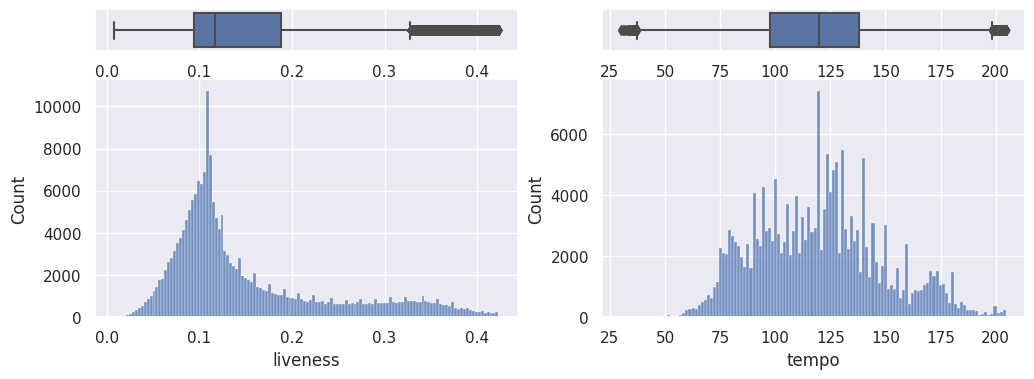

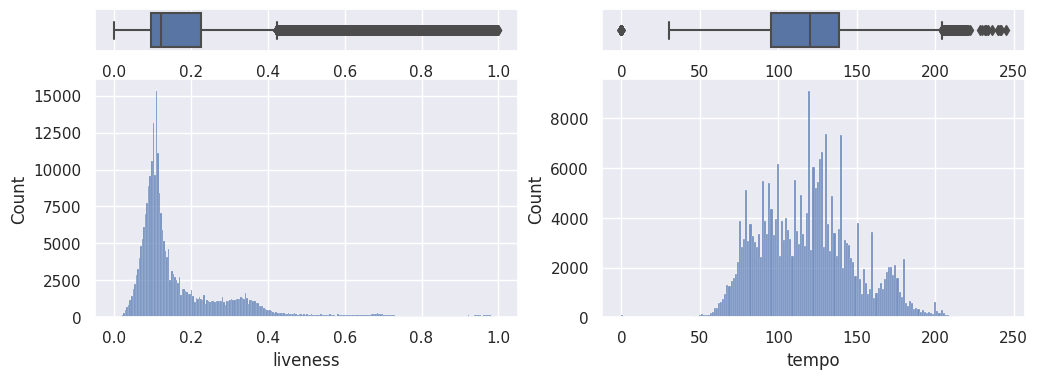

In [ ]:
print_box_hist(new_df_1, "duration (ms)", "danceability")
print_box_hist(new_df, "duration (ms)", "danceability")
print_box_hist(new_df_1, "loudness", "speechiness")
print_box_hist(new_df, "loudness", "speechiness")
print_box_hist(new_df_1, "liveness", "tempo")
print_box_hist(new_df, "liveness", "tempo")

### 2.2. Partition Data
Split data into testing and training sets either with CV or train test split


In [ ]:
# create the X and y variables
X = new_df.drop(columns = 'labels')
y = new_df['labels']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y , random_state=42, test_size=.3)

## 3. Building Models

In [ ]:
# Create statistical performance report
def eval(y, y_pred):
    accuracy = round(accuracy_score(y, y_pred),2)
    print('Accuracy Score: ', accuracy*100, '\n')

    cm = confusion_matrix(y, y_pred)
    print('Confusion Matrix:')
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.unique(y))
    # build a plot for the CM
    plt.figure(figsize=(8,6))
    display_cm.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.grid(False)
    plt.show();

    report = classification_report(y, y_pred)
    print('Classification Report:')
    print(report)

### 3.1. Baseline Model - Logistic Regression

In [ ]:
# from base64 import standard_b64decode
# separate out the values that need to be a normal distribution
transform_columns = [ "valence", "instrumentalness", "acousticness", 'energy', 'speechiness', 'duration (ms)', 'loudness', 'spec_rate', 'liveness' ]
# build out pipelines for logistic regression
# use the 'yeo-johnson' trnsformer since some of the values above have negative values
yeo_johnson_transformer = PowerTransformer(method = 'yeo-johnson')
# create log transformer
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.expm1)
# create scaler
standard_scaler = StandardScaler()
# get model
log_reg = LogisticRegression()
# create transformer
column_transformer = ColumnTransformer(
       transformers = [('yeo-johnson', yeo_johnson_transformer, transform_columns)],
                    remainder = 'passthrough'
                )

In [ ]:
# create pipeline Log Reg
create_log_pipeline = make_pipeline(column_transformer, standard_scaler, log_reg)
# fit the model to the X_train and y_train data
create_log_pipeline.fit(X_train_1, y_train_1)
# make predictions on this
predictions_train = create_log_pipeline.predict(X_train_1)
predictions_test = create_log_pipeline.predict(X_test_1)
# build confusion matrix for both training and testing
cm_log_train = confusion_matrix(y_train_1, predictions_train)
cm_log_test = confusion_matrix(y_test_1, predictions_test)
# build CM plot for balanced and unbalanced
cmplot_train = ConfusionMatrixDisplay(confusion_matrix = cm_log_train, display_labels = create_log_pipeline.classes_)
cmplot_tested = ConfusionMatrixDisplay(confusion_matrix = cm_log_test, display_labels = create_log_pipeline.classes_)
# build classification reports
log_train_report = classification_report(y_train_1, predictions_train)
log_test_report = classification_report(y_test_1, predictions_test)

In [ ]:
# print out both classification reports to see if any overfitting has occured
print("-----------------Train--------------------------")
print(log_train_report)
print("-----------------Test--------------------------")
print(log_test_report)

-----------------Train--------------------------
              precision    recall  f1-score   support

        calm       0.92      0.94      0.93     29683
   energetic       0.82      0.77      0.80     32997
       happy       0.82      0.85      0.83     74380
         sad       0.86      0.83      0.84     57496

    accuracy                           0.85    194556
   macro avg       0.85      0.85      0.85    194556
weighted avg       0.85      0.85      0.85    194556

-----------------Test--------------------------
              precision    recall  f1-score   support

        calm       0.92      0.95      0.93     12703
   energetic       0.82      0.77      0.79     14068
       happy       0.82      0.85      0.83     32049
         sad       0.86      0.83      0.84     24562

    accuracy                           0.84     83382
   macro avg       0.85      0.85      0.85     83382
weighted avg       0.84      0.84      0.84     83382



In [ ]:
#transform_columns = ['spec_rate', 'liveness', "valence",
                    #  "instrumentalness", "acousticness", 'loudness',
                    #  'speechiness', 'duration (ms)', 'energy']
# build out pipelines for logistic regression
# use the 'yeo-johnson' trnsformer since some of the values above have negative values
#yeo_johnson_transformer = PowerTransformer(method = 'yeo-johnson')
# create scaler
standard_scaler_test = StandardScaler()
# get model
log_reg_test = LogisticRegression()
# create transformer
# column_transformer = ColumnTransformer(
#     transformers = [('yeo-johnson', yeo_johnson_transformer, transform_columns)],
#     remainder = 'passthrough'
# )

In [ ]:
create_log_pipeline_t = make_pipeline(standard_scaler_test, log_reg_test)
create_log_pipeline_t.fit(X_train_1, y_train_1)
predictions_train_t = create_log_pipeline_t.predict(X_train_1)
predictions_test_t = create_log_pipeline_t.predict(X_test_1)
log_train_report_t = classification_report(y_train_1, predictions_train_t)
log_test_report_t = classification_report(y_test_1, predictions_test_t)

In [ ]:
print("-----------------Train Nonnormal distribtuions--------------------------")
print(log_train_report_t)
print("-----------------Test Nonnormal distribtuions--------------------------")
print(log_test_report_t)

-----------------Train Nonnormal distribtuions--------------------------
              precision    recall  f1-score   support

        calm       0.93      0.94      0.94     29683
   energetic       0.80      0.77      0.78     32997
       happy       0.81      0.85      0.83     74380
         sad       0.85      0.82      0.84     57496

    accuracy                           0.84    194556
   macro avg       0.85      0.84      0.85    194556
weighted avg       0.84      0.84      0.84    194556

-----------------Test Nonnormal distribtuions--------------------------
              precision    recall  f1-score   support

        calm       0.92      0.95      0.93     12703
   energetic       0.80      0.76      0.78     14068
       happy       0.81      0.85      0.83     32049
         sad       0.85      0.81      0.83     24562

    accuracy                           0.84     83382
   macro avg       0.85      0.84      0.84     83382
weighted avg       0.84      0.84      0

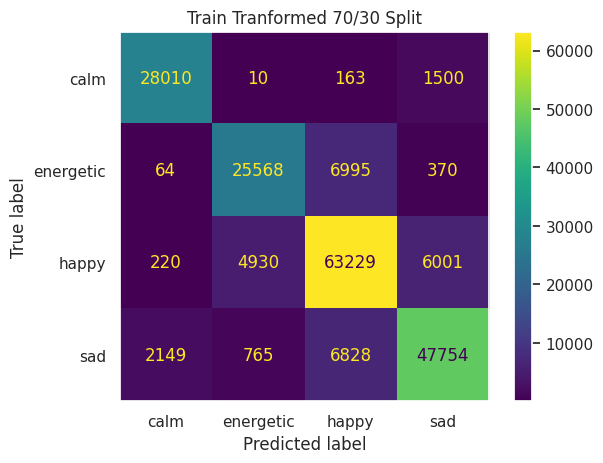

In [ ]:
# display both the coonfusion matrices---")
cmplot_train.plot()
plt.title('Train Tranformed 70/30 Split')
plt.grid(False);

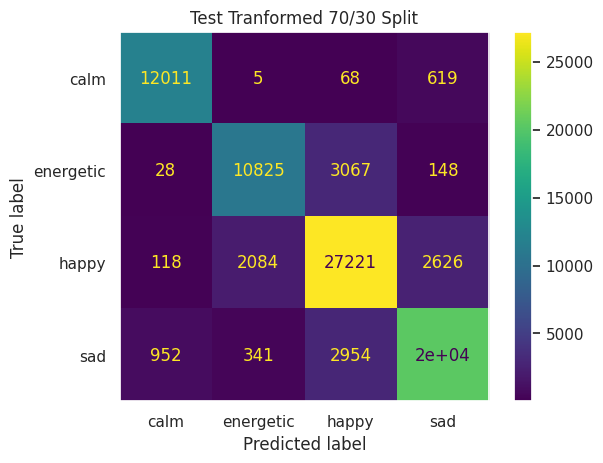

In [ ]:
# display both the coonfusion matrices
cmplot_tested.plot()
plt.title('Test Tranformed 70/30 Split')
plt.grid(False);

In [ ]:
# build a LR model again with CV
cv_log_reg = cross_validate(create_log_pipeline_t, X, y, cv =5, scoring = 'accuracy', return_train_score=True)
# get scores for all 5 runs then the mean of the scores for training and testing
print("Train scores:", cv_log_reg['train_score'])
print("Test scores:", cv_log_reg['test_score'])
print("Mean train score:", cv_log_reg['train_score'].mean())
print("Mean test score:", cv_log_reg['test_score'].mean())

Train scores: [0.84117832 0.8398201  0.8393119  0.83790044 0.83888986]
Test scores: [0.82100453 0.83239188 0.83942578 0.84145574 0.83814561]
Mean train score: 0.8394201243172474
Mean test score: 0.8344847074956668


In [ ]:
#obtain the mean scores for training and testing and store them in a variable for late use
cv_log_acc_train = round(cv_log_reg['train_score'].mean(),2)
cv_log_acc_test = round(cv_log_reg['test_score'].mean(),2)

In [ ]:
from sklearn.model_selection import cross_val_predict
# build CV classification report
cv_log_reg = cross_val_predict(create_log_pipeline, X, y, cv =5)
label_names = ['sad',"happy",'energetic', "calm"]
class_report = classification_report(y, cv_log_reg, target_names=label_names)
# Print the classification report
print(class_report)


              precision    recall  f1-score   support

         sad       0.92      0.94      0.93     42386
       happy       0.81      0.76      0.79     47065
   energetic       0.81      0.85      0.83    106429
        calm       0.86      0.83      0.84     82058

    accuracy                           0.84    277938
   macro avg       0.85      0.85      0.85    277938
weighted avg       0.84      0.84      0.84    277938



### 3.2 XGBoost Model

In [ ]:
# get data ready for xgboost
xgboost_data = remove_outliers(base_df, columns_to_remove)
X_xgboost = xgboost_data.drop(columns = ['labels', 'energy'])
y_xgboost = xgboost_data['labels']
# split data into testing and training sets
# split the xgboost 50/50 to help reduce overfitting
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_xgboost, y_xgboost , random_state=42, test_size=.5)
# add scaler
standard_scaler_xgb = StandardScaler()
## make model
xgboost_model = xgb.XGBClassifier()
# use select best k to get the top 10 features
k_10 = 10
select_best_k = SelectKBest(score_func=f_classif, k = k_10)
# make pipeline for xgboost
xgb_pipe = make_pipeline(standard_scaler_xgb, select_best_k, xgboost_model)
# make grid for hyper parameter tuning
grid = {
    'xgbclassifier__max_depth': [2,4,6],
    'xgbclassifier__learning_rate': [1, .1, .01],
    'xgbclassifier__n_estimators': [50, 100, 150]
}

# create grid search with cross validation
grid_search = GridSearchCV(estimator = xgb_pipe, param_grid = grid, cv = 5, n_jobs = 2)
# fit the grid search
grid_search.fit(X_train_boost, y_train_boost)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=2,
             param_grid={'xgbclassifier__learning_rate': [1, 0.1, 0.01],
                         'xgbclassifier__max_depth': [2, 4, 6],
                         'xgbclassifier__n_estimators': [50, 100, 150]})

In [ ]:
# obtain the best parameters for the model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
# make predictions on the training and test sets
train_pred = best_model.predict(X_train_boost)
test_pred = best_model.predict(X_test_boost)
# build the confusion matrix for both training and testing
cm_xbg_train = confusion_matrix(y_train_boost, train_pred)
cm_xgb_test = confusion_matrix(y_test_boost, test_pred)
# build CM plots
train_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_xbg_train, display_labels= best_model.classes_ )
test_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_test, display_labels= best_model.classes_ )
# build classification reports
train_xgb_report = classification_report(y_train_boost, train_pred)
test_xgb_report = classification_report(y_test_boost, test_pred)
## print out the reports
print(f'Best Hyperparameters {best_parameters}')
print('n\'')
print('--------Training classification report--------------')
print(train_xgb_report)
print('--------Testing Classification Report-----------')
print(test_xgb_report)

Best Hyperparameters {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 150}
n'
--------Training classification report--------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     32539
           1       0.93      0.94      0.93     37358
           2       0.94      0.93      0.93     16886
           3       0.97      0.97      0.97     11651

    accuracy                           0.94     98434
   macro avg       0.95      0.95      0.95     98434
weighted avg       0.94      0.94      0.94     98434

--------Testing Classification Report-----------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     32983
           1       0.90      0.91      0.90     36951
           2       0.90      0.88      0.89     16812
           3       0.95      0.94      0.94     11689

    accuracy                           0.91     98435
   macro

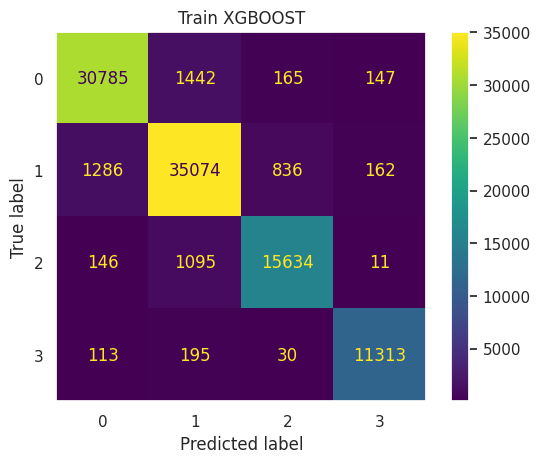

In [ ]:
# display both the confusion matrices XGBOOST)
train_cm_plots.plot()
plt.title('Train XGBOOST')
plt.grid(False);

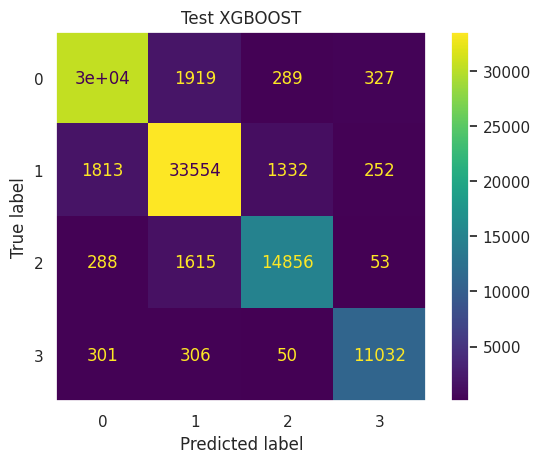

In [ ]:
# display both the confusion matrices XGBOOST)
test_cm_plots.plot()
plt.title('Test XGBOOST')
plt.grid(False);

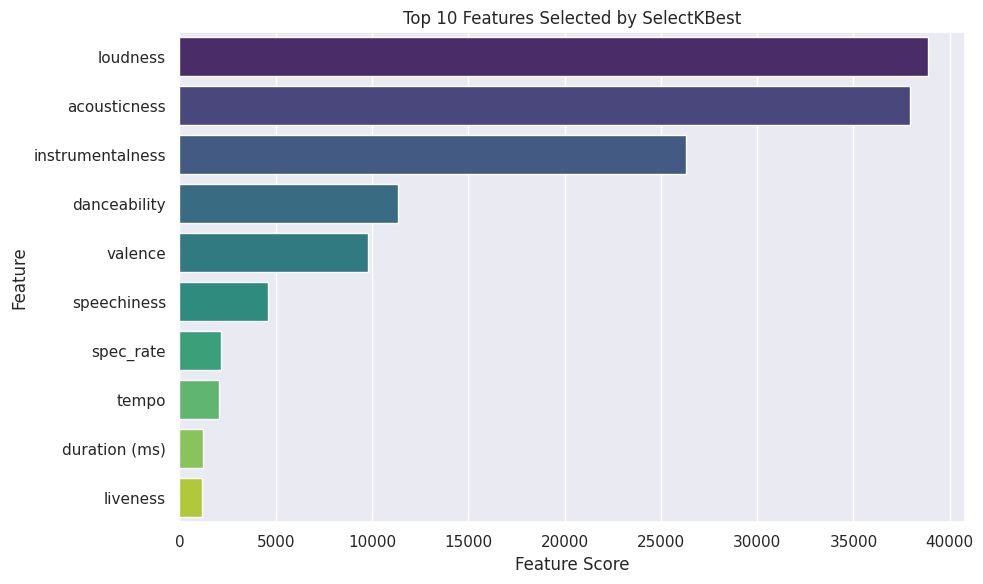

In [ ]:
# obtain the 10 ten best features from te select best k method
# get scores from the features
column_scores = grid_search.best_estimator_.named_steps['selectkbest'].scores_
# get the column anmes
column_names = X_train_boost.columns
# create a dataset to store the names and there scores
scores_df = pd.DataFrame({'Features': column_names, 'Score': column_scores})
# sort the dataset
sorted_df = scores_df.sort_values(by = 'Score', ascending = False)
top_ten_features = sorted_df.head(10)
# Create a bar chart to visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Features', data=top_ten_features, palette='viridis')
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top 10 Features Selected by SelectKBest')
plt.tight_layout()
plt.show()

### 3.3 K-Means Clustering Model

In [ ]:
# Using 70/30 data partition

X = base_df.drop(columns = 'labels')
y = base_df['labels']

mms = MinMaxScaler()
mms.fit(X)
X_mms = mms.transform(X)

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_mms, y , random_state=42, test_size=.3)

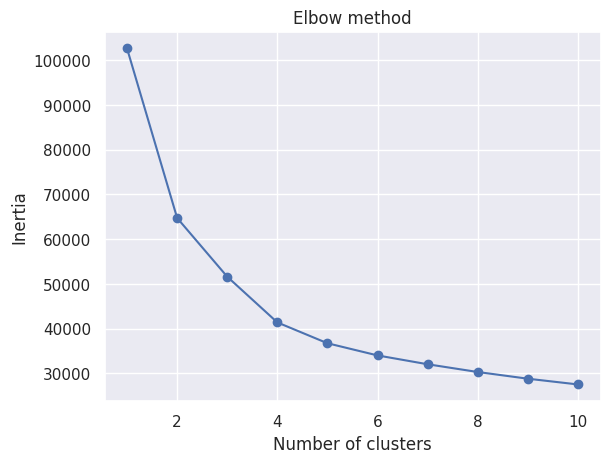

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train_k, y_train_k)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker= 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Accuracy Score:  14.000000000000002 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

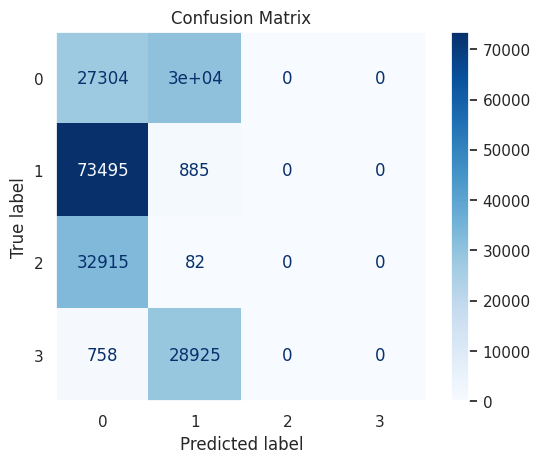

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.47      0.28     57496
           1       0.01      0.01      0.01     74380
           2       0.00      0.00      0.00     32997
           3       0.00      0.00      0.00     29683

    accuracy                           0.14    194556
   macro avg       0.05      0.12      0.07    194556
weighted avg       0.07      0.14      0.09    194556



In [ ]:
kmeans = KMeans(n_clusters=2, random_state = 42)

# Train Set
kmeans.fit(X_train_k)
y_pred_kmean_train = kmeans.predict(X_train_k)
eval(y_train_k, y_pred_kmean_train)

Accuracy Score:  14.000000000000002 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

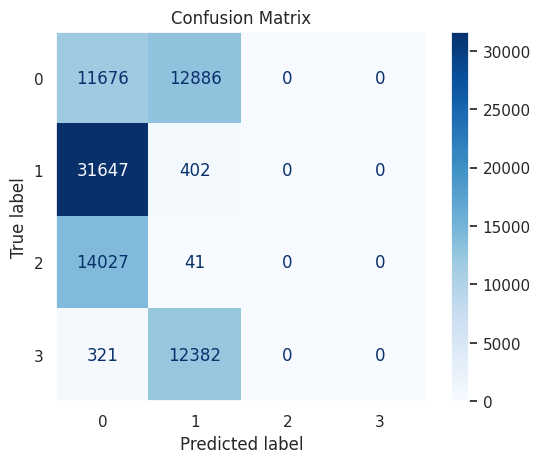

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.48      0.28     24562
           1       0.02      0.01      0.01     32049
           2       0.00      0.00      0.00     14068
           3       0.00      0.00      0.00     12703

    accuracy                           0.14     83382
   macro avg       0.05      0.12      0.07     83382
weighted avg       0.07      0.14      0.09     83382



In [ ]:
 # Test Set
kmeans.fit(X_train_k)
y_pred_kmeans_test = kmeans.predict(X_test_k)
eval(y_test_k, y_pred_kmeans_test)

Generally k-means clustering is not used to classify, but to group data together. Thus the statstical performance may not have done well for our task.

### 3.4 Random Forest Model

Accuracy Score:  100.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

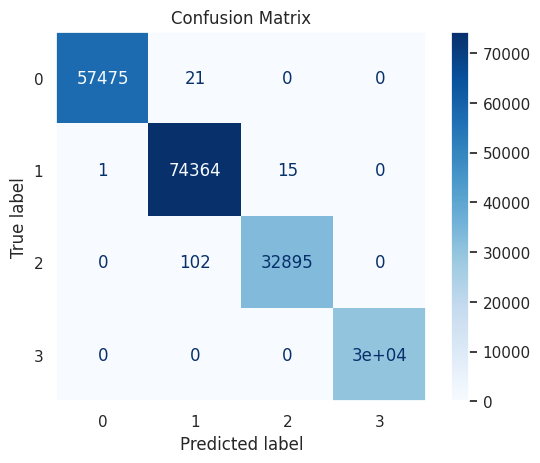

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57496
           1       1.00      1.00      1.00     74380
           2       1.00      1.00      1.00     32997
           3       1.00      1.00      1.00     29683

    accuracy                           1.00    194556
   macro avg       1.00      1.00      1.00    194556
weighted avg       1.00      1.00      1.00    194556



In [ ]:
rf = RandomForestClassifier(max_depth=20, random_state=42, n_estimators=150).fit(X_train_k, y_train_k)

# Train Set
y_pred_rf_train = rf.predict(X_train_k)
eval(y_train_k, y_pred_rf_train)

Accuracy Score:  94.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

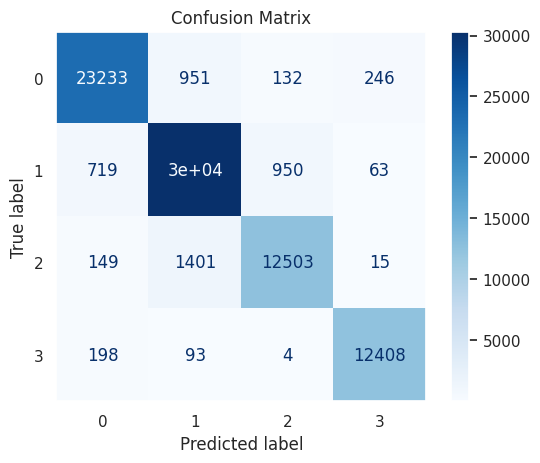

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     24562
           1       0.93      0.95      0.94     32049
           2       0.92      0.89      0.90     14068
           3       0.97      0.98      0.98     12703

    accuracy                           0.94     83382
   macro avg       0.94      0.94      0.94     83382
weighted avg       0.94      0.94      0.94     83382



In [ ]:
# Test Set
y_pred_rf_test = rf.predict(X_test_k)
eval(y_test_k, y_pred_rf_test)

Adjusted to decrease depth of decision trees

Accuracy Score:  88.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

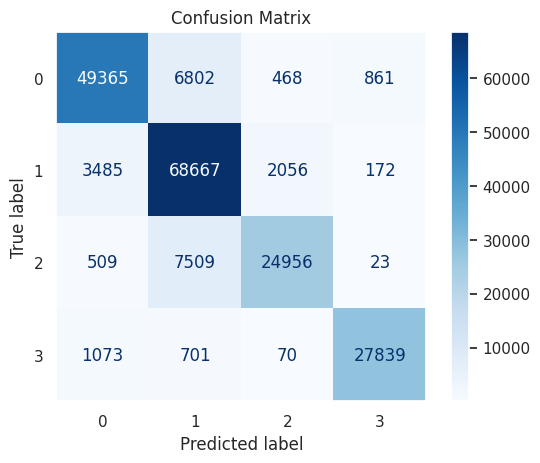

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     57496
           1       0.82      0.92      0.87     74380
           2       0.91      0.76      0.82     32997
           3       0.96      0.94      0.95     29683

    accuracy                           0.88    194556
   macro avg       0.90      0.87      0.88    194556
weighted avg       0.88      0.88      0.88    194556



In [ ]:
rf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=150).fit(X_train_k, y_train_k)

# Train Set
y_pred_rf_train = rf.predict(X_train_k)
eval(y_train_k, y_pred_rf_train)

Accuracy Score:  87.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

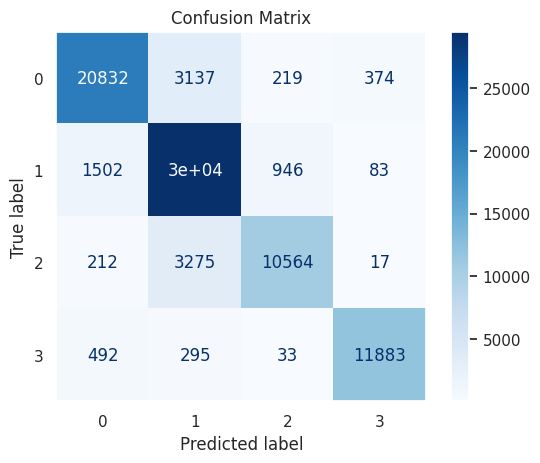

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     24562
           1       0.81      0.92      0.86     32049
           2       0.90      0.75      0.82     14068
           3       0.96      0.94      0.95     12703

    accuracy                           0.87     83382
   macro avg       0.89      0.86      0.88     83382
weighted avg       0.88      0.87      0.87     83382



In [ ]:
# Test Set
y_pred_rf_test = rf.predict(X_test_k)
eval(y_test_k, y_pred_rf_test)

Accuracy Score:  93.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

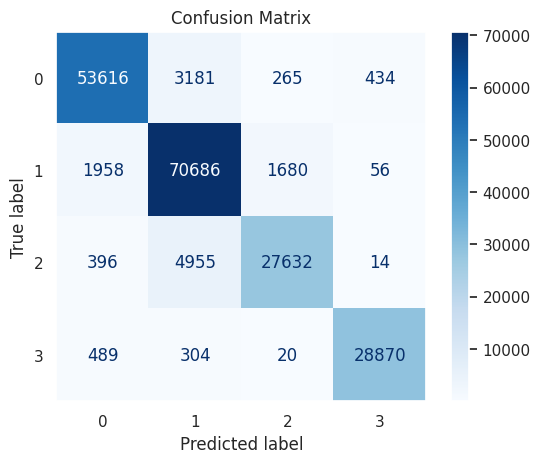

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     57496
           1       0.89      0.95      0.92     74380
           2       0.93      0.84      0.88     32997
           3       0.98      0.97      0.98     29683

    accuracy                           0.93    194556
   macro avg       0.94      0.92      0.93    194556
weighted avg       0.93      0.93      0.93    194556



In [ ]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=150).fit(X_train_k, y_train_k)

# Train Set
y_pred_rf_train = rf.predict(X_train_k)
eval(y_train_k, y_pred_rf_train)

Accuracy Score:  92.0 

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

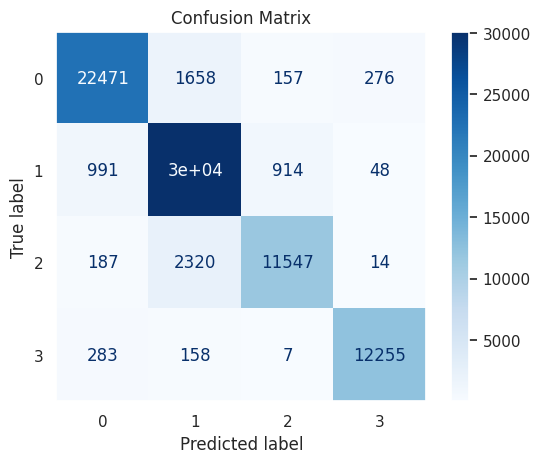

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     24562
           1       0.88      0.94      0.91     32049
           2       0.91      0.82      0.87     14068
           3       0.97      0.96      0.97     12703

    accuracy                           0.92     83382
   macro avg       0.93      0.91      0.92     83382
weighted avg       0.92      0.92      0.92     83382



In [ ]:
# Test Set
y_pred_rf_test = rf.predict(X_test_k)
eval(y_test_k, y_pred_rf_test)

After evaluating the three different depths in the random forest model, the optimal appeared to be when max_depth = 10, although the train set slightly performed better compared to the test set.

### 3.5 Neural Networks Model

In [ ]:
#import needed libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

#split data  70/30
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=.3)
#standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# for multi class classification we need to transfrom output to be fed into the NN since we have 4 target values we need to adjust the y_train and y_test
num_classes = 4
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

#Create the neural network model

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(36, activation='relu'),
    Dense(4, activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the model on the test set
loss_train, nn_accuracy_train = model.evaluate(X_train_scaled, y_train_encoded)
print(f"train loss: {loss_train:.4f}, Train accuracy: {nn_accuracy_train:.4f}")

6080/6080 [==============================] - 10s 2ms/step - loss: 1.3457 - accuracy: 0.3421
train loss: 1.3457, Train accuracy: 0.3421


Epoch 1/10
4864/4864 [==============================] - 15s 3ms/step - loss: 0.3450 - accuracy: 0.8565 - val_loss: 0.3007 - val_accuracy: 0.8747
Epoch 2/10
4864/4864 [==============================] - 12s 2ms/step - loss: 0.2876 - accuracy: 0.8779 - val_loss: 0.2707 - val_accuracy: 0.8840
Epoch 3/10
4864/4864 [==============================] - 14s 3ms/step - loss: 0.2697 - accuracy: 0.8848 - val_loss: 0.2592 - val_accuracy: 0.8899
Epoch 4/10
4864/4864 [==============================] - 12s 3ms/step - loss: 0.2595 - accuracy: 0.8894 - val_loss: 0.2560 - val_accuracy: 0.8899
Epoch 5/10
4864/4864 [==============================] - 13s 3ms/step - loss: 0.2525 - accuracy: 0.8921 - val_loss: 0.2463 - val_accuracy: 0.8937
Epoch 6/10
4864/4864 [==============================] - 13s 3ms/step - loss: 0.2462 - accuracy: 0.8951 - val_loss: 0.2435 - val_accuracy: 0.8959
Epoch 7/10
4864/4864 [==============================] - 14s 3ms/step - loss: 0.2414 - accuracy: 0.8966 - val_loss: 0.2379 - val_ac

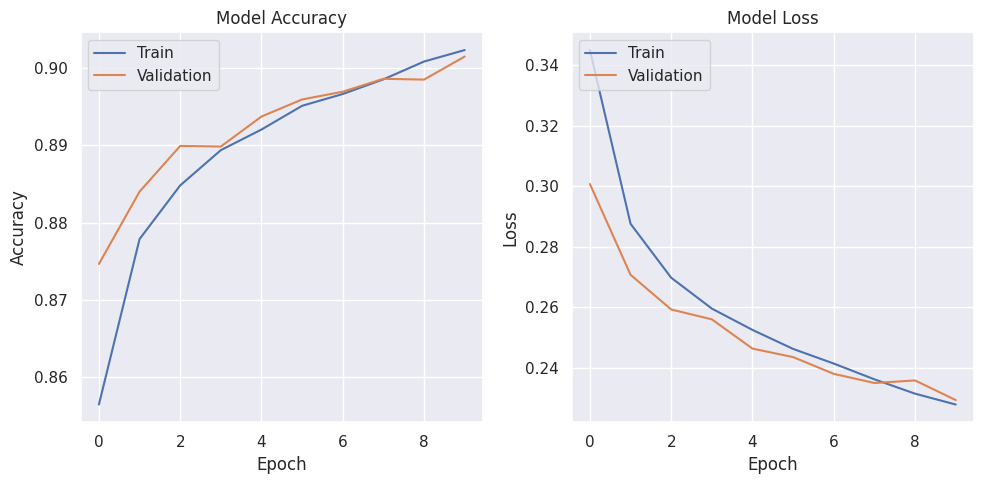

In [ ]:
# Train the model and store the training history
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

2606/2606 [==============================] - 4s 2ms/step - loss: 0.2355 - accuracy: 0.8998
Test loss: 0.2355, Test accuracy: 0.8998


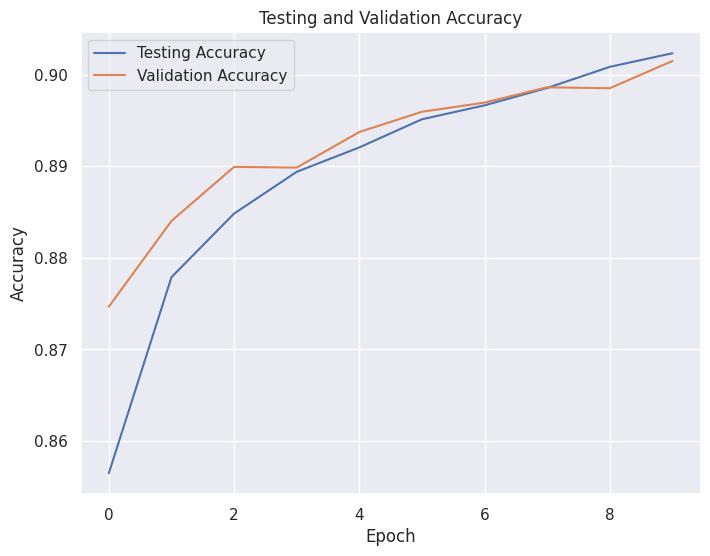

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
loss_test, nn_accuracy_test = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test loss: {loss_test:.4f}, Test accuracy: {nn_accuracy_test:.4f}")

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train the model and store the training history
# history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Make prediction of test dataset
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # This code will convert the softmax probabilities to class labels
y_pred_labels_train = np.argmax(y_pred_train, axis=1)


6080/6080 [==============================] - 9s 1ms/step


In [ ]:
# Build a classification report - test data
report = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_labels)
print("Classification Report - Test:\n", report)

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     24562
           1       0.87      0.91      0.89     32049
           2       0.90      0.81      0.85     14068
           3       0.96      0.96      0.96     12703

    accuracy                           0.90     83382
   macro avg       0.91      0.90      0.90     83382
weighted avg       0.90      0.90      0.90     83382



In [ ]:
# Build a classification report - training data
train_report = classification_report(np.argmax(y_train_encoded, axis=1), y_pred_labels_train)
print("Classification Report - Train:\n", train_report)

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     57496
           1       0.88      0.91      0.89     74380
           2       0.90      0.82      0.86     32997
           3       0.97      0.96      0.96     29683

    accuracy                           0.90    194556
   macro avg       0.91      0.90      0.91    194556
weighted avg       0.90      0.90      0.90    194556



In [ ]:
# Create the confusion matrix
confusion = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
print(confusion)

[[22301  1756   143   362]
 [ 1653 29148  1166    82]
 [  254  2420 11381    13]
 [  353   152     4 12194]]


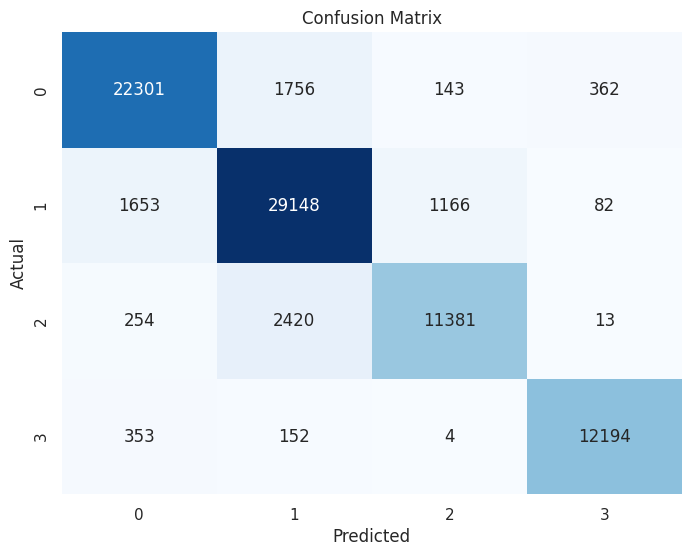

In [ ]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Evaluate the model on the training set
loss_train, accuracy_train = model.evaluate(X_train_scaled, y_train_encoded)

# Evaluate the model on the test set
loss_test, accuracy_test = model.evaluate(X_test_scaled, y_test_encoded)

2606/2606 [==============================] - 5s 2ms/step - loss: 0.2355 - accuracy: 0.8998


## 4. Modeling Results & Findings

In [ ]:
# gather all the accruacy scores for each model and store them in a dataframe
# Logistic regression training and testing accruacy score
log_reg_train_acc = round(accuracy_score(y_train_1, predictions_train),2)
log_reg_test_acc = round(accuracy_score(y_test_1, predictions_test),2)
log_reg_cv_acc_train = cv_log_acc_train
log_reg_cv_acc_test = cv_log_acc_test
# Get XGBoost training and testing score
xgb_train_acc = round(accuracy_score(y_train_boost, train_pred),2)
xgb_test_acc = round(accuracy_score(y_test_boost, test_pred),2)
# KMean acc score
kmean_acc_train = round(accuracy_score(y_train_k, y_pred_kmean_train),2)
kmean_acc_test = round(accuracy_score(y_test_k, y_pred_kmeans_test),2)
# Random Forest Scores
rf_train_acc = round(accuracy_score(y_train_k, y_pred_rf_train),2)
rf_test_acc = round(accuracy_score(y_test_k, y_pred_rf_test),2)

## Neural Network accruacy
nn_accuracy_tr = round(accuracy_train, 2)
nn_accuracy_te = round(accuracy_test, 2)

# build dictionary to store the models and there corresponding accruacy score
all_models = {'Models': ['Logistic Reg',  'Log Reg CV ', 'XBG ',
                         'Kemans ',  'Random Forest', 'Neural Network'],
              'Train_Scores': [log_reg_train_acc, log_reg_cv_acc_train,
                              xgb_train_acc, kmean_acc_train,
                              rf_train_acc, nn_accuracy_tr],
              'Test_Scores': [log_reg_test_acc, log_reg_cv_acc_test,
                             xgb_test_acc, kmean_acc_test, rf_test_acc,
                            nn_accuracy_te]
}


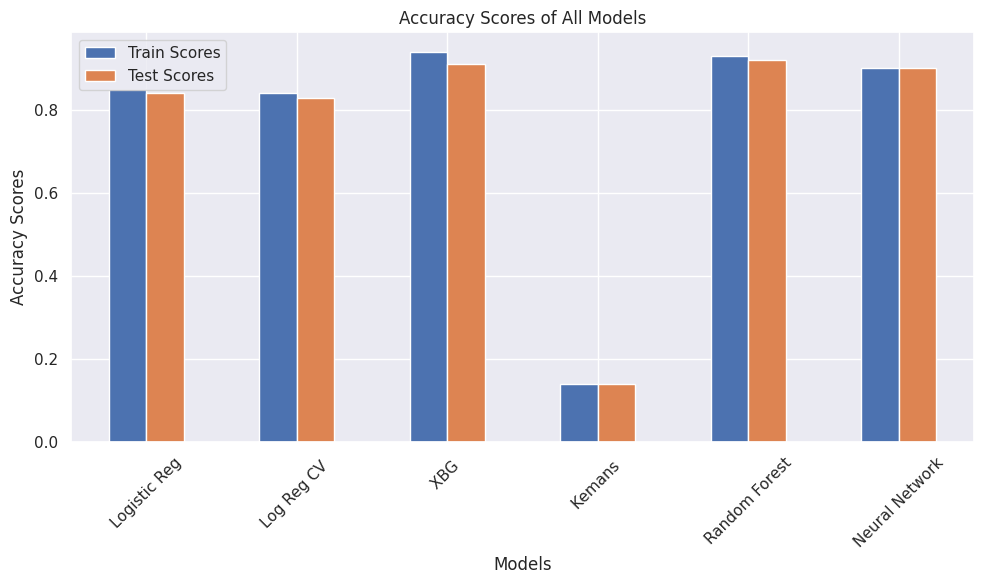

In [ ]:
# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(all_models)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
scores_df.plot(kind='bar', x='Models', y=['Train_Scores', 'Test_Scores'], ax=ax)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of All Models')
plt.xticks(rotation=45)
plt.legend(['Train Scores', 'Test Scores'], loc = 'upper left')
plt.tight_layout()

# Show the plot
plt.show()